In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Funcion calcula_graph
#### Funcion encargada de devolver un array ordenado con el porcentaje

In [2]:
def calcula_graph(result, indice, rango):

    # Ordenamos con la funcion np.digitalize
    #     https://stackoverflow.com/questions/17413624/how-to-organize-values-in-a-numpy-array-into-bins-that-contain-a-certain-range-o

    binplace = np.digitize(result[:,indice], rango)

    # Calculamos el numero de errores
    #    https://stackoverflow.com/questions/21778118/counting-the-number-of-non-nan-elements-in-a-numpy-ndarray-matrix-in-python
    error = np.isnan(result[:, indice])[np.isnan(result[:, indice]) == True].size

    #Una vez ordenados se cuentan el numero de veces repetido
    num = np.array([np.count_nonzero(binplace==i) for i in range(0,len(rango)+1)])

    #Se ordena dado que NaN queda ordenado como un elemento del ultimo de la lista de rangos
    num[0] = error
    num[len(rango)] -= error

    #Expresamos el vector en tanto por ciento
    num = (1 / len(result)) * 100 * num
    return num


In [3]:
#Introducir las rutas manualmente

## Ruta al archivo de deteccion
path_detection = "detection.csv"
## Ruta al archivo de droundtruth.
path_groundtruth = "groundtruth.csv"


# ----------------------------
# Main
# ----------------------------

In [4]:
if __name__ == "__main__":
    #Lectura de ficheros

    groundtruth = np.genfromtxt(fname=path_groundtruth, delimiter=',', skip_header=1, missing_values='-')
    detection = np.genfromtxt(fname=path_detection, delimiter=',', skip_header=1, missing_values='-')
    # np.array del resultado de la diferencia
    result = abs(groundtruth-detection)

    # Calculo de los vectores 
    ## Rangos
    rango_areas =  0,50,100,150,200,250
    rango_complexity = 0,1,2,3,4
    ## vectores
    area2D = calcula_graph(result,indice=1,rango=rango_areas)
    area3D = calcula_graph(result,indice=2,rango=rango_areas)
    complexity = calcula_graph(result,indice=3,rango=rango_complexity)


### Visualizacion de datos

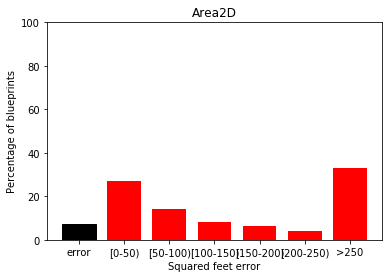

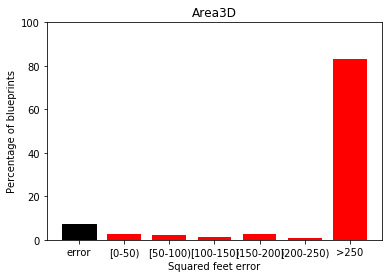

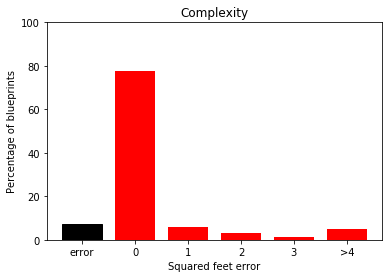

In [5]:

#Figure area2d
N = 7
ind = np.arange(N)


fig, ax = plt.subplots()
plt.ylim(0,100)
rects = ax.bar(ind, area2D, 0.75, color='r')
rects[0].set_color('k')
ax.set_xticklabels(('[0]', 'error', '[0-50)', '[50-100)', '[100-150)', '[150-200)', '[200-250)', '>250'))
plt.xlabel('Squared feet error' )
plt.ylabel('Percentage of blueprints')
plt.title('Area2D' )
fig.savefig("area2d.png")
plt.show()

#Figure area3d
fig, ax = plt.subplots()
plt.ylim(0,100)
rects = ax.bar(ind, area3D, 0.75, color='r')
rects[0].set_color('k')
ax.set_xticklabels(('[0]', 'error', '[0-50)', '[50-100)', '[100-150)', '[150-200)', '[200-250)', '>250'))
plt.xlabel('Squared feet error')
plt.ylabel('Percentage of blueprints')
plt.title('Area3D')
fig.savefig("area3d.png")
plt.show()


# Figure complexity
N = 6
ind = np.arange(N)


fig, ax = plt.subplots()
plt.ylim(0,100)
rects = ax.bar(ind, complexity, 0.75, color='r')
rects[0].set_color('k')
ax.set_xticklabels(('[0]', 'error', '0', '1', '2', '3', '>4'))
plt.xlabel('Squared feet error')
plt.ylabel('Percentage of blueprints')
plt.title('Complexity')
fig.savefig("complexity.png")
plt.show()


